#Topic Modeling of Reviews:
Purpose: To understand the primary themes or subjects that emerge from the reviews.
Tools & Techniques:
Latent Dirichlet Allocation (LDA): This method is designed to discover topics within a collection of texts. Each topic will be a mix of words, and each document (review in this case) will be a mix of topics.
Steps:
##Data Preprocessing:

Tokenization: Convert sentences into words.
Remove stopwords: Words such as "and", "the", "is", etc.
Lemmatization: Convert words into their base form. E.g., "running" becomes "run".
Convert text to a bag of words or TF-IDF representation.
##LDA Model Training:

Use libraries like gensim to train the LDA model.
Decide on the number of topics (can use coherence score to determine optimal number).
##Analyze the Topics:

Look at the terms that appear in each topic.
Label each topic based on the terms, e.g., "Cleanliness", "Location", "Host Communication".
#Classification of Reviews:
##Purpose:
To classify new reviews into the topics discovered.
##Tools & Techniques:
##Supervised Learning Models:
Such as Logistic Regression, Random Forest, or Gradient Boosting, depending on the dataset's size and complexity.
##Steps:
###Training Data Creation:

Use the topics from LDA as labels.
Split the data into training and test sets.
###Model Training:

Represent each review using bag of words or TF-IDF.
Train a classifier to predict the topic of a new review.
###Model Validation:

Use metrics like accuracy, precision, recall, or F1-score to determine model performance on the test set.

#Sentiment Analysis
First, you need to perform sentiment analysis on the reviews to classify them as positive, negative, or neutral. Sentiment analysis can be accomplished using a library such as NLTK in Python.

# Data
### Seattle Airbnb Open Data
Datasets used: http://insideairbnb.com/get-the-data/

## Table of Content

- Getting Started, importing and understanding data
- Data Preprocessing and Preparation, cleaning data, Feature Engineering
- Unsupervised Sentiment Analysis
- Latent Dirichlet Allocation
- Sentiment Prediction using Vader
- Classification of reviews



#Getting Started

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Dataset

In [3]:
import numpy as np
import pandas as pd


listings = pd.read_csv('/content/drive/MyDrive/Extras/London/listings.csv')
rev = pd.read_csv('/content/drive/MyDrive/Extras/London/reviews.csv', on_bad_lines='skip')

#reducing data set to 5% of exisitng
reviews = rev.sample(frac=0.05)


reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
11378,80123,33350613,2015-05-27,13413538,Roque,The coach house is located in a pretty and qui...
525911,15896278,125704286,2017-01-07,55309204,Nikkitha,"This is a great location for a quiet, contempl..."
753590,22592225,419609377,2019-03-04,70697981,Jane,"Beautiful room, bathroom spotless, lovely host."
394021,11395444,231711506,2018-02-02,10259190,Raymond,Exceptional home with close access to central ...
1322158,625237645300024377,729511084586922732,2022-10-03,474984203,Karen,Lovely house with an amazing owner. Marion wen...


#LDA Data Preprocessing

In [4]:
# Import necessary libraries and modules from Gensim and NLTK
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from textblob import TextBlob

!pip install matplotlib seaborn
#Matplot libraries
import matplotlib.pyplot as plt
import seaborn as sns


#SVM Model
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import TruncatedSVD

#Random Forest Model
# Import necessary libraries for text vectorization and classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
#Import metrics
from sklearn import metrics

# Download the stopwords dataset from NLTK.
# Stopwords are commonly used words (like 'and', 'the') that are typically removed from texts to help in text processing.
import nltk
nltk.download('stopwords')

# Create a set of English stopwords using NLTK
stop_words = set(stopwords.words('english'))

# Define a preprocessing function to process and clean the text
def preprocess(text):
    result = []  # An empty list to store processed tokens
    # Use Gensim's simple_preprocess method to convert a document into a list of lowercase tokens,
    # discarding tokens that are too short or too long.
    for token in gensim.utils.simple_preprocess(text):
        # Only add tokens to the result that are not in the list of stop words
        if token not in stop_words:
            result.append(token)
    return result  # Return the processed tokens
# Convert all non-string data to string
reviews['comments'] = reviews['comments'].apply(lambda x: '' if pd.isnull(x) else str(x))


# Assume 'reviews' is your dataframe and 'reviews' is the column with review texts
processed_reviews = reviews['comments'].map(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#LDA Model Training

In [5]:
# import gensim
# import random

# # Ensure processed_reviews is a list or tuple.
# if not isinstance(processed_reviews, (list, tuple)):
#     processed_reviews = list(processed_reviews)

# # Sample a very small subset of reviews, like 5%.
# sample_size = int(0.05 * len(processed_reviews))
# sampled_reviews = random.sample(processed_reviews, sample_size)

# # Create a dictionary from the sampled reviews.
# dictionary = gensim.corpora.Dictionary(sampled_reviews)

# # Extremely aggressive filtering of the dictionary.
# dictionary.filter_extremes(no_below=20, no_above=0.2, keep_n=2000)

# # Convert the sampled reviews into a bag-of-words format.
# corpus = [dictionary.doc2bow(review) for review in sampled_reviews]

# # Use the basic LdaModel instead of LdaMulticore.
# lda_model = gensim.models.LdaModel(
#     corpus,
#     num_topics=2,
#     id2word=dictionary,
#     passes=1,
#     iterations=10
# )

# # Print the top 5 words from each of the topics.
# topics = lda_model.print_topics(num_words=5)
# for topic in topics:
#     print(topic)


In [6]:

# Create a dictionary from the processed reviews. This dictionary maps every word to a unique ID.
dictionary = gensim.corpora.Dictionary(processed_reviews)

# Convert the processed reviews into a bag-of-words format. Each review is represented as
# a list of (word_id, word_frequency) tuples.
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Create an LDA (Latent Dirichlet Allocation) model. This is a type of probabilistic model
# often used for topic modeling.
# 'num_topics' specifies the number of topics to find in the data.
# 'id2word' provides a mapping from word IDs to words (used to determine word-topic distributions).
# 'passes' is the number of times the algorithm will pass over the whole corpus.
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the top 5 words from each of the 10 topics.
# The model provides a distribution of words for each topic.
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.034*"de" + 0.026*"la" + 0.025*"et" + 0.022*"br" + 0.019*"très"')
(1, '0.035*"und" + 0.027*"br" + 0.023*"die" + 0.021*"sehr" + 0.017*"ist"')
(2, '0.040*"great" + 0.037*"stay" + 0.030*"place" + 0.024*"location" + 0.021*"clean"')
(3, '0.025*"br" + 0.011*"station" + 0.010*"walk" + 0.009*"tube" + 0.009*"room"')
(4, '0.024*"de" + 0.019*"en" + 0.014*"br" + 0.009*"een" + 0.009*"muito"')


###Assign Topics to Documents

In [7]:
# Ensure 'reviews' dataframe contains tokenized 'comments'.
reviews['tokenized_comments'] = reviews['comments'].apply(lambda x: x.split())  # this is a simple tokenization method. You might want to use a more sophisticated method for real-world applications.

def get_dominant_topic(tokenized_review):
    bow = dictionary.doc2bow(tokenized_review)
    topics = lda_model[bow]
    # Sort topics by their weight in the review and return the dominant topic
    return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]

# Create a new column in the reviews dataframe that assigns the dominant topic to each review.
reviews['dominant_topic'] = reviews['tokenized_comments'].apply(get_dominant_topic)


###Sentiment Analysis

In [8]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

reviews['sentiment'] = reviews['comments'].apply(get_sentiment)


###Analyze Sentiment Distribution per Topic

In [9]:
sentiment_distribution = reviews.groupby('dominant_topic')['sentiment'].value_counts().unstack().fillna(0)
print(sentiment_distribution)

sentiment       negative  neutral  positive
dominant_topic                             
0                   1204    30352     15976
1                    571     6957      3491
2                    584     2002    233047
3                   4525     4986    130642
4                    174     4324      1414


###Topic Names:
0 - Stay
1 - Location
2 - Food
3 - Stay
4 - Travel

###Visualization of Sentiment Distribution

In [10]:
grouped_data = reviews.groupby(['dominant_topic', 'sentiment']).size().reset_index(name='count')


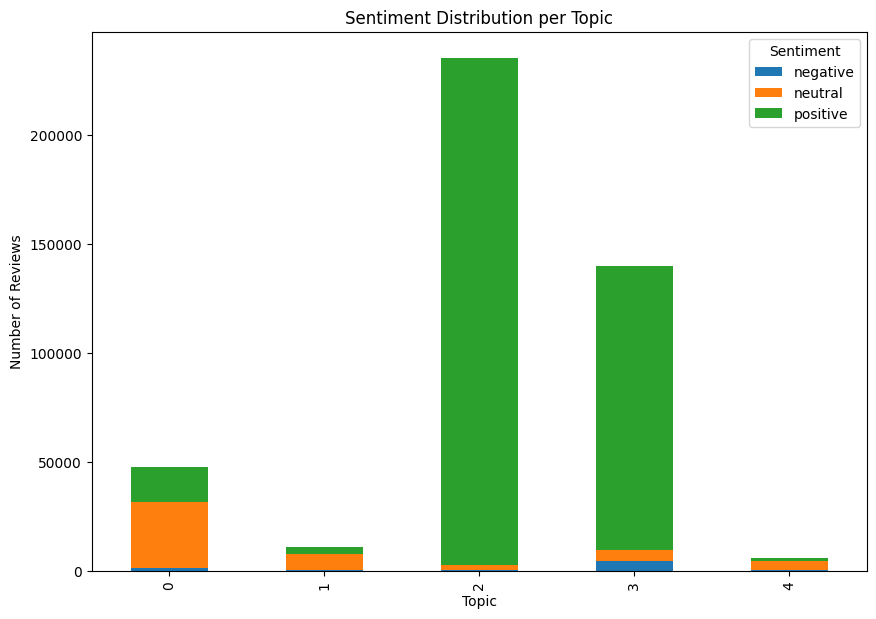

In [11]:
# Pivot the data to get it in the right shape for a stacked bar chart
pivot_data = grouped_data.pivot(index='dominant_topic', columns='sentiment', values='count').fillna(0)

# Create the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.title('Sentiment Distribution per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()


# Classification of Reviews

###Training Data Creation

In [1]:
# Assigning a topic to each review
reviews['topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(reviews))]

# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews['comments'], reviews['topic'], test_size=0.2)


NameError: ignored

###RandomForest Model Training

In [13]:
# Limit the number of features produced by TF-IDF and adjust RandomForest parameters
model = make_pipeline(
    TfidfVectorizer(max_features=5000),
    RandomForestClassifier(n_estimators=20, max_depth=10)
)
model.fit(X_train, y_train)

# Test the model
predicted = model.predict(X_test)


###RandomForest Model Testing

In [14]:
# Model Accuracy
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))

Random Forest Accuracy: 0.7490403180011357


###SVM Model Training

In [ ]:


# Limit the max features for the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Learn vocabulary from training texts and vectorize training texts.
X_train_vectorized = vectorizer.fit_transform(X_train)

# Vectorize test texts.
X_test_vectorized = vectorizer.transform(X_test)

# Optionally, you can reduce dimensionality here, but it's an extra step you can test.
svd = TruncatedSVD(n_components=1000)
X_train_vectorized = svd.fit_transform(X_train_vectorized)
X_test_vectorized = svd.transform(X_test_vectorized)

# Use the SGD classifier with 'hinge' loss to approximate SVM with a linear kernel.
clf = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)

# Train the model using the training sets
clf.fit(X_train_vectorized, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test_vectorized)


###SVM Model Testing

In [ ]:
# Model Accuracy
print("SVM Accuracy:", metrics.accuracy_score(y_test, y_pred))